In [1]:
####################################################
# CODE TO PLOT MONTHLY MEAN NDVI VALUES 
# BEFORE AND AFTER THE INTERVENTIONS
# 
# INPUTS: LANDSAT 7 & 8 TIMESERIES DATA
#
# DATE:   Jun 24, 2021
# Author: VIKALP MISHRA
#         SERVIR SCO
####################################################

Import python packages 

In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Modify path to your GEE extracted data files

In [2]:
wdir = '/path/to/your/directory/'

Elkokia_0 2013 38.6


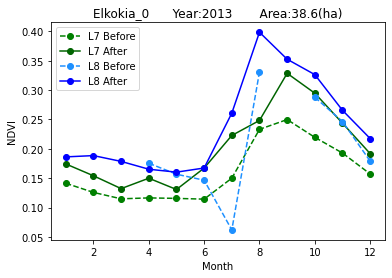

SystemExit: 

/Users/vmishra2/miniconda3/envs/ee/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
for year in range(2011,2020):
    f2 = wdir+str(year)+'_L7.csv'
    
    if os.path.exists(f2):
        # read in NDVI and precip csv files
        ch = pd.read_csv(wdir+str(year)+'_chirps.csv')
        l7 = pd.read_csv(wdir+str(year)+'_L7.csv')
        l8 = pd.read_csv(wdir+str(year)+'_L8.csv')
        
        # convert date to datetime object
        ch.id = pd.to_datetime(ch.id)
        l7.Date = pd.to_datetime(l7.Date)
        l8.Date = pd.to_datetime(l8.Date)
        
        # set Date as index 
        ch = ch.set_index(ch.id)
        l7 = l7.set_index(l7.Date)
        l8 = l8.set_index(l8.Date)
        
        # drop date column from Landsat dataframes 
        l7 = l7.drop(columns='Date')
        l8 = l8.drop(columns='Date')
        
        # Read in a file named table to get the polygon area 
        # its optional 
        tb = pd.read_csv(wdir+'table.csv')
        
        # NDVI values less than 0 can be considered as nan
        # since this represents water and most of these 
        # sites does not have water bodies, its most likely
        # due to cloud contamination -- optional
        l7 = l7.where(l7 > 0, np.nan)
        l8 = l8.where(l8 > 0, np.nan)
        
        # set intervention year cutoffs 
        # y1 = intervention year 
        # y2 = year next to intervention 
        y1 = str(year)
        y2 = str(year+1)
        
        
        # split dataframe based on year of intervention
        # xNy 
        #     x refers to sensor [l for landsat; s for sentinal]
        #     N is the sensor series [7 or 8 or 2]
        #     y refers to serier type [a - After; b-Before intervention]
        
        l7b = l7[:y1+'-12-31']
        l7a = l7[y2+'-1-1':]
        
        l8b = l8[:y1+'-12-31']
        l8a = l8[y2+'-1-1':]
        
        
        # group by months
        l7a_m = l7a.groupby(by = [l7a.index.month]).median()
        l7b_m = l7b.groupby(by = [l7b.index.month]).median()
    
        l8a_m = l8a.groupby(by = [l8a.index.month]).median()
        l8b_m = l8b.groupby(by = [l8b.index.month]).median()   
        
        
        cols = l7.columns
        for col in cols:
            area = None
            for i in range(len(tb)):
                tmp = tb.Name[i]+'_'+str(tb.FID[i])
                if tmp == col and tb.Year[i] == year:
                    area = str(tb.Area[i])
                    print(tmp,year, area)
    
                    # Plotting 
                    #------------
                    plt.plot(l7b_m[col], color ='green', label='L7 Before', marker = 'o', ls = '--')
                    plt.plot(l7a_m[col], color = 'darkgreen', label = 'L7 After', marker = 'o')
                    plt.plot(l8b_m[col], color ='dodgerblue', label='L8 Before', marker = 'o', ls = '--')
                    plt.plot(l8a_m[col], color = 'blue', label = 'L8 After', marker = 'o')
                    
                    plt.title(col+'      Year:'+str(year)+'       Area:'+area+'(ha)')
                    plt.xlabel('Month')
                    plt.ylabel('NDVI')
                    plt.legend()
                    plt.show()
                    #plt.savefig(wdir+'BA_'+str(year)+'_'+col+'.png', dpi = 300)
                    #plt.close()
                    #sys.exit()